# Advice for Applying Machine Learning

## 1 - Packages

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from assigment_utils import *

# sklearn
from sklearn.model_selection import train_test_split

# tensorflow
import tensorflow as tf
from tensorflow.keras import Seque
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

## 2 - Evaluate a learning algorithm (Polynomial Regression)

We need find a model that can predict well on ***new, not seen*** samples
* Split original dataset into  ***Train and Test set***
    - Train set: fit the parameters of model
    - Test set: evaluate the model on new data


In [44]:
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)

In [45]:
# proper of dataset
print(f'shape of X --> {X.shape}, y --> {y.shape}')
print(f'shape of x_ideal --> {x_ideal.shape}, y_ideal --> {y_ideal.shape}')

shape of X --> (18,), y --> (18,)
shape of x_ideal --> (18,), y_ideal --> (18,)


In [46]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

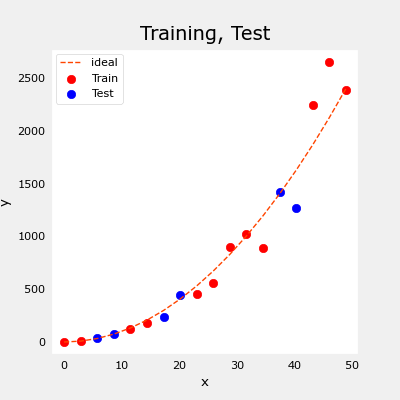

In [47]:
# plot dataset
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, c='red', label='Train')
ax.scatter(X_test, y_test, c='blue', label='Test')
ax.legend()
plt.show()

In [48]:
class Linear_model:
    def __init__(self, degree, regularization=False, lambda_=0):
        if regularization:
            self.linear_model = Ridge(alpha=lambda_)
        else:
            self.linear_model = LinearRegression()
            
        self.create_polynomial_feature = PolynomialFeatures(degree, include_bias=False)
        self.scale_feature = StandardScaler()
        
    def fit(self, X_train, y_train):
        X_train_mapped = self.create_polynomial_feature.fit_transform(X_train.reshape(-1, 1))
        X_train_mapped_scaled = self.scale_feature.fit_transform(X_train_mapped)
        self.linear_model.fit(X_train_mapped_scaled, y_train)
        
    def predict(self, X):
        X_mapped = self.create_polynomial_feature.transform(X.reshape(-1, 1))
        X_mapped_scaled = self.scale_feature.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return yhat
    def mse(self, y, yhat):
        err = mean_squared_error(y, yhat)/2
        return err

Error of train set: 0.00
Error of test set: 332713.15


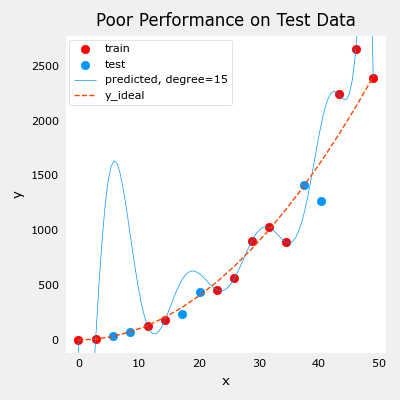

In [60]:
# create model and evaluate
degree = 15

my_linear_model = Linear_model(degree)
my_linear_model.fit(X_train, y_train)

predict_train = my_linear_model.predict(X_train)
err_train = my_linear_model.mse(y_train, predict_train)

predict_test = my_linear_model.predict(X_test)
err_test = my_linear_model.mse(y_test, predict_test)
print(f'Error of train set: {err_train:0.2f}')
print(f'Error of test set: {err_test:0.2f}')
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = my_linear_model.predict(x).reshape(-1,1)


plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [50]:
degree_list = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
err_train_list = []
err_test_list = []

for degree in degree_list:
    my_linear_model = Linear_model(degree)
    my_linear_model.fit(X_train, y_train)

    predict_train = my_linear_model.predict(X_train)
    err_train = my_linear_model.mse(y_train, predict_train)
    err_train_list.append(err_train)

    predict_test = my_linear_model.predict(X_test)
    err_test = my_linear_model.mse(y_test, predict_test)
    err_test_list.append(err_test)

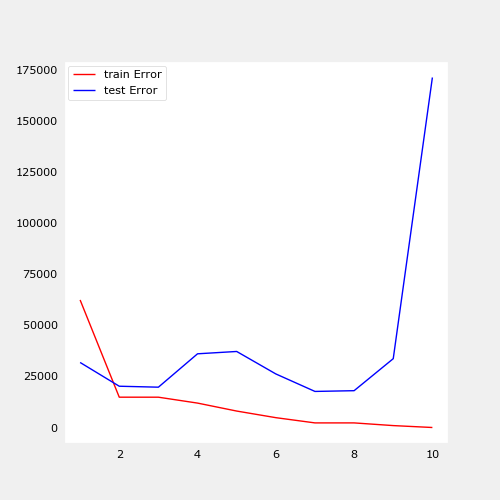

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(degree_list, err_train_list, color='red', linewidth=1, label='train Error')
ax.plot(degree_list, err_test_list, color='blue', linewidth=1, label='test Error')
ax.legend()

plt.show()

In [52]:
# Split data into 3 sets with ratio ==> 6/2/2
def train_dev_test_split(X, y, train_size=0.6, dev_size=0.2, test_size=0.2):
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=42)
    X_dev, X_test, y_dev, y_test = train_test_split(X_, y_, train_size=0.5, random_state=42)
    return (X_train, X_dev, X_test, y_train, y_dev, y_test)

In [53]:
# X_train, X_dev, X_test, y_train, y_dev, y_test = train_dev_test_split(X, y, train_size=0.6, dev_size=0.2, test_size=0.2)
print(f'shape of train: {X_train.shape}')
print(f'shape of train: {X_dev.shape}')
print(f'shape of train: {X_test.shape}')

shape of train: (12,)
shape of train: (4,)
shape of train: (6,)


## 3 - Bias and Variance

In [69]:
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

X_train, X_cv, X_test, y_train, y_cv, y_test = train_dev_test_split(X, y, train_size=0.6, dev_size=0.2, test_size=0.2)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


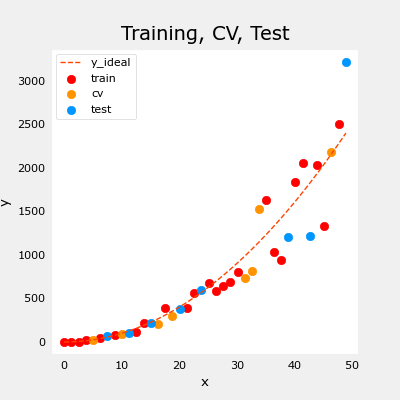

In [70]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [80]:
max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, max_degree))

for degree in range(max_degree):
    my_linear_model = Linear_model(degree+1)
    my_linear_model.fit(X_train, y_train)

    predict_train = my_linear_model.predict(X_train)
    err = my_linear_model.mse(y_train, predict_train)
    err_train[degree] = err
    
    predict_test = my_linear_model.predict(X_test)
    err = my_linear_model.mse(y_test, predict_test)
    err_cv[degree] = err
    
    y_pred[:, degree] = my_linear_model.predict(x)
    
optimal_degree = np.argmin(err_cv) + 1

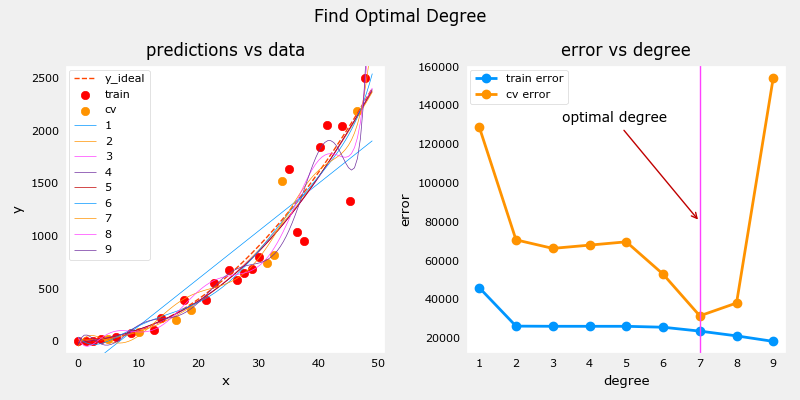

In [81]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

In [82]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

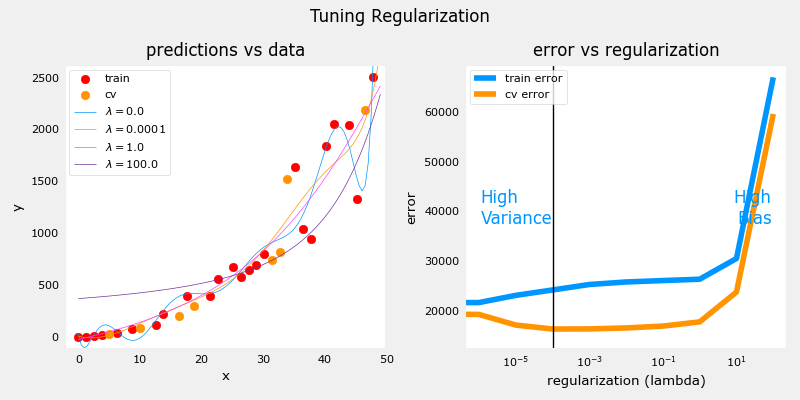

In [83]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

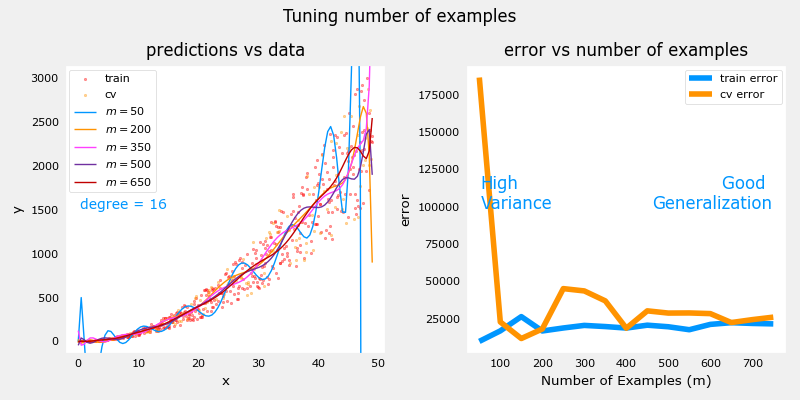

In [85]:
## Getting more data
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

## 4 - Evaluate a learning algorithm (Neural Network)

In [87]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


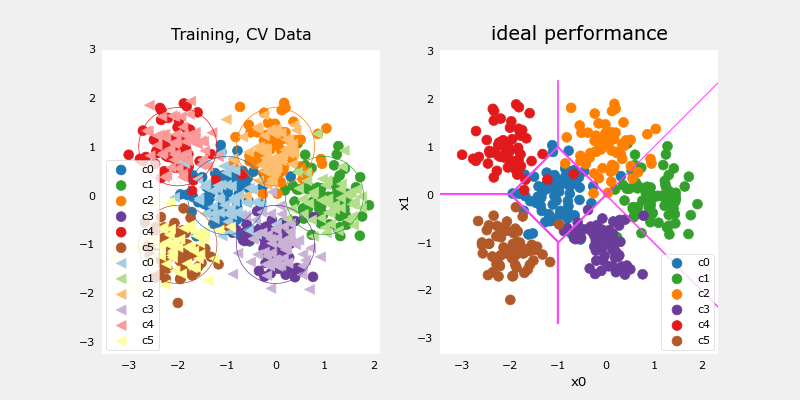

In [88]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

## 5 - Model complexity
* Model architecture:
    - Dense layer with 120 units, relu activation
    - Dense layer with 40 units, relu activation
    - Dense layer with 6 units and a linear activation (not softmax)
    - Compile using
    - loss with SparseCategoricalCrossentropy, remember to use from_logits=True
    - Adam optimizer with learning rate of 0.01.

In [92]:
tf.random.set_seed(1234)
NN_model = Sequential([
    Input(shape=((2,))),
    Dense(units=120, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=6, activation='linear')
], name='complex')

NN_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(lr=0.01))

model.fit(X_train, y_train, epochs=1000)
    

NameError: name 'Sequential' is not defined

## 6 - Regularization

## 7 - Iterate to find optimal regularization value